# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

import os
import gzip
import numpy as np

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
num = 2072050
np.random.seed(num)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [73 50 65 49 60 60 61 66 64 52]


In [6]:
#function for plotting an image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


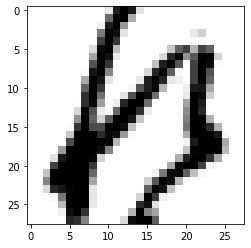

LABEL: 8
INPUT:


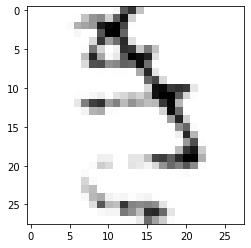

LABEL: 1
INPUT:


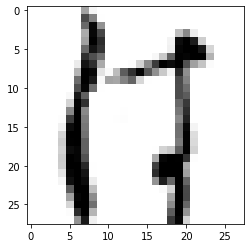

LABEL: 5
INPUT:


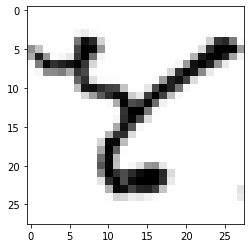

LABEL: 9


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)


Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM
svc = SVC(kernel='linear')
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train,y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", clf.best_params_)

print("Score with best parameters: ", f"{clf.best_score_:.6}")

print("All scores on the grid:", clf.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.1}
Score with best parameters:  0.755
All scores on the grid: [0.75333333 0.755      0.755      0.755     ]


Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

svc_p2 = SVC(kernel='poly', degree=2)
clf_p2 = GridSearchCV(svc_p2, parameters, cv=4)
clf_p2.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", clf_p2.best_params_)

print("Score with best parameters:", clf_p2.best_score_)

print("\nAll scores on the grid:", clf_p2.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 0.1}
Score with best parameters: 0.77

All scores on the grid: [0.12166667 0.77       0.765      0.46333333 0.76666667 0.765
 0.77       0.765      0.765     ]



Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3


svc_p3 = SVC(kernel='poly', degree=degree)
clf_p3 = GridSearchCV(svc_p3, parameters, cv=4)
clf_p3.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE =', degree, ' KERNEL')

print("Best parameters set found:", clf_p3.best_params_)

print("Score with best parameters:", clf_p3.best_score_)

print("\nAll scores on the grid:", clf_p3.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE = 3  KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 0.1}
Score with best parameters: 0.7116666666666667

All scores on the grid: [0.12166667 0.71166667 0.69166667 0.41       0.68666667 0.69166667
 0.70833333 0.69166667 0.69166667]



Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

svc_rbf = SVC(kernel='rbf')
clf_rbf = GridSearchCV(svc_rbf, parameters, cv=4)
clf_rbf.fit(X_train,y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:", clf_rbf.best_params_)

print("Score with best parameters:", clf_rbf.best_score_)

print("\nAll scores on the grid:", clf_rbf.cv_results_['mean_test_score'])

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 10, 'gamma': 0.01}
Score with best parameters: 0.8150000000000001

All scores on the grid: [0.12166667 0.195      0.12166667 0.12166667 0.63333333 0.77833333
 0.13       0.12166667 0.77333333 0.815      0.14333333 0.12166667
 0.77166667 0.815      0.14333333 0.12166667]


Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV

#the best SVM is with rbf kernel and C=10, gamma = 0.01, as it shows the highest score
best_SVM = SVC(kernel='rbf', C=10, gamma = 0.01)
best_SVM.fit(X_train,y_train)

# (error is 1 - svm.score)

training_error = 1 - best_SVM.score(X_train, y_train)

test_error = 1 - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.188500



Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


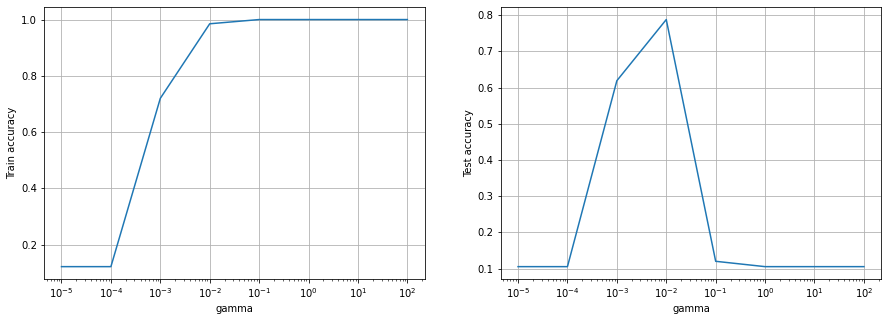

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []


SVM_gamma = np.array([])
for i in gamma_values:
    SVM_gamma = np.append(SVM_gamma, SVC(kernel='rbf', C=1, gamma = i))
    
for i in range(len(SVM_gamma)):
    SVM_gamma[i].fit(X_train, y_train)
    train_acc_list.append(SVM_gamma[i].score(X_train, y_train))
    test_acc_list.append(SVM_gamma[i].score(X_test,y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

1) Train accuracy increases with increasing of gamma, becoming in the end 1 (the training error becomes zero). It means that the larger gamma, the better we can 'put' our training data into the right class.

2) On the other hand, if we look at the test accuracy, we clearly can see a peak. Firstly with increasing of gamma test accuracy increases. But at value of $10^{-2}$ it reaches maximum and then drops.

As we can see, there is an optimal value of gamma, because our goal is to have the best performance on the test data. If we have zero error on our training data and then extremly bad performance on our test data, then we are in a case of overfitting. We do not want this, so we choose gamma = $10^{-2}$ as it gives us the best performance on the test data (also the error on the training set is ~ 0).

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [230 181 198 232 173 210 192 193 191 200]



Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. 

In [16]:
#get training and test error for the best SVM model from CV

best_SVM2 = SVC(kernel='rbf', C=10, gamma = 0.01)
best_SVM2.fit(X_train,y_train)

training_error = 1 - best_SVM.score(X_train, y_train)

test_error = 1 - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.170500
Best SVM test error: 0.176862


Just for comparison, let's also use logistic regression 


In [17]:
from sklearn import linear_model

from sklearn.metrics import accuracy_score #for quick error estimation

logreg = linear_model.LogisticRegression(C=1e5, max_iter=5000)
learning = logreg.fit(X_train,y_train)

prediction_train = learning.predict(X_train)
prediction_test = learning.predict(X_test)

training_error = 1 - accuracy_score(prediction_train, y_train)
test_error = 1 - accuracy_score(prediction_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.279293


Try  with regularization (use C=1)¶

In [18]:
logreg = linear_model.LogisticRegression(C=1, max_iter=5000)
learning = logreg.fit(X_train,y_train)

prediction_train = learning.predict(X_train)
prediction_test = learning.predict(X_test)

training_error = 1 - accuracy_score(prediction_train, y_train)
test_error = 1 - accuracy_score(prediction_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.000500
Best regularized logistic regression test error: 0.250948



Items that are missclassified by logistic regression and correctly classified by SVM.

In [19]:
LR_prediction = prediction_test
SVM_prediction = best_SVM2.predict(X_test) 

In [20]:
#list with all the indexes classified correctly with SVM and misclassified by LR 
index = [i for i in range(len(LR_prediction)) if LR_prediction[i] != SVM_prediction[i] and SVM_prediction[i] == y_test[i]]

In [21]:
print('Number of such cases: ', len(index))
ratio = len(index)/len(LR_prediction)
print('Ratio of all such cases in all test data: ', f'{ratio:.3}')

Number of such cases:  8488
Ratio of all such cases in all test data:  0.146



Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)



confusion_SVM = sklearn.metrics.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  sklearn.metrics.confusion_matrix(y_test, prediction_test)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5770 5819 5802 5768 5827 5790 5808 5807 5809 5800]

 Confusion matrix SVM  
 
 [[5359   11    0   55   83   38   13   87   85   39]
 [  15 5011  118  108  149   25  144    3   70  176]
 [   0   76 4738  173   65   39  381   34  209   87]
 [   8   28  103 5390   27   80   22   19   78   13]
 [ 199  117  121   67 5018   28   76   33   96   72]
 [  49   44  122  171   44 5160   72   18   73   37]
 [  11  137  354   40  207   19 4915   52   51   22]
 [  56   15   47   88  155   21   56 5270   64   35]
 [  28  110   72   67   21   40  203    4 5222   42]
 [  17  154  133   18  134    8   17   22   48 5249]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.01 0.01 0.01 0.   0.02 0.01 0.01]
 [0.   0.86 0.02 0.02 0.03 0.   0.02 0.   0.01 0.03]
 [0.   0.01 0.82 0.03 0.01 0.01 0.07 0.01 0.04 0.01]
 [0.   0.   0.02 0.93 0.   0.01 0.   0.   0.01 0.  ]
 [0.03 0.02 0.02 0.01 0.86 0.   0.01 0.01 0.02 0.01]
 [0.01 0.01 0.02 0.03 0.01 0.89 0.01 0.   0.0

In [23]:
confusion_SVM = sklearn.metrics.confusion_matrix(y_test, SVM_prediction, normalize = 'true')
print("\n Confusion matrix SVM  \n \n", confusion_SVM)

confusion_LR =  sklearn.metrics.confusion_matrix(y_test, prediction_test, normalize = 'true')
print("\n Confusion matrix LR  \n \n", confusion_LR)


 Confusion matrix SVM  
 
 [[0.93 0.   0.   0.01 0.01 0.01 0.   0.02 0.01 0.01]
 [0.   0.86 0.02 0.02 0.03 0.   0.02 0.   0.01 0.03]
 [0.   0.01 0.82 0.03 0.01 0.01 0.07 0.01 0.04 0.01]
 [0.   0.   0.02 0.93 0.   0.01 0.   0.   0.01 0.  ]
 [0.03 0.02 0.02 0.01 0.86 0.   0.01 0.01 0.02 0.01]
 [0.01 0.01 0.02 0.03 0.01 0.89 0.01 0.   0.01 0.01]
 [0.   0.02 0.06 0.01 0.04 0.   0.85 0.01 0.01 0.  ]
 [0.01 0.   0.01 0.02 0.03 0.   0.01 0.91 0.01 0.01]
 [0.   0.02 0.01 0.01 0.   0.01 0.03 0.   0.9  0.01]
 [0.   0.03 0.02 0.   0.02 0.   0.   0.   0.01 0.91]]

 Confusion matrix LR  
 
 [[0.85 0.   0.   0.01 0.03 0.04 0.   0.03 0.01 0.02]
 [0.   0.73 0.05 0.02 0.04 0.03 0.04 0.   0.04 0.05]
 [0.   0.04 0.6  0.03 0.03 0.05 0.12 0.02 0.08 0.05]
 [0.   0.01 0.03 0.81 0.03 0.06 0.01 0.01 0.03 0.01]
 [0.04 0.04 0.04 0.02 0.72 0.02 0.03 0.02 0.02 0.04]
 [0.01 0.02 0.03 0.06 0.01 0.8  0.02 0.01 0.02 0.01]
 [0.   0.05 0.07 0.02 0.04 0.02 0.73 0.02 0.03 0.01]
 [0.02 0.01 0.02 0.03 0.03 0.04 0.02 0.8  0

We can see that for SVM the range of accuracies is 0.82 - 0.93, while for the LR it is 0.6 - 0.85. It is clearly seen that in all classes SVM classifies better (accuracy is higher).

At the same time, we can see that the lowest accuracy for SVM is at the same position as the lowest accuracy for LR (as well as highest, for example). This makes me think that the differences between accuracies is due to our datasets and not models. For example, it can be because each class has a bit different number of samples (thus the classes with higher number of samples have higher accuracy).